In [2]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap


In [3]:

#importing datasets
data_set= pd.read_csv('/content/drive/MyDrive/MachineLearning/K-NN/User_Data.csv')

#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values

In [4]:
# Splitting the dataset into training and test set.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)


In [5]:
#feature Scaling

st_x= StandardScaler()

x_train= st_x.fit_transform(x_train)

x_test= st_x.transform(x_test)


In [6]:
#Fitting K-NN classifier to the training set

classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )

classifier.fit(x_train, y_train)


KNeighborsClassifier()

In [7]:
#Predicting the test set result

y_pred= classifier.predict(x_test)


In [8]:
#Creating the Confusion matrix

cm= confusion_matrix(y_test, y_pred)


<ipython-input-9-8d0bae588f61>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


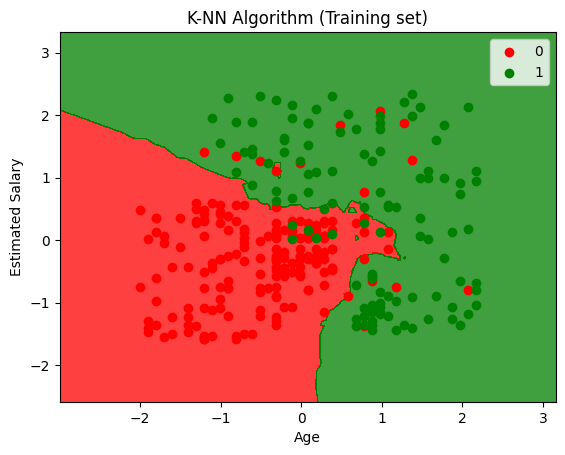

In [9]:
#Visulaizing the trianing set result

x_set, y_set = x_train, y_train

x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),

nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),

alpha = 0.75, cmap = ListedColormap(('red','green' )))

mtp.xlim(x1.min(), x1.max())

mtp.ylim(x2.min(), x2.max())

for i, j in enumerate(nm.unique(y_set)):

    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],

        c = ListedColormap(('red', 'green'))(i), label = j)

mtp.title('K-NN Algorithm (Training set)')

mtp.xlabel('Age')

mtp.ylabel('Estimated Salary')

mtp.legend()

mtp.show()